In [29]:
from functools import partial

import torch
import torch.nn as nn
import torch.nn.functional as F

from models.nam import NAM
from models.dnn import DNN
from models.utils import *

from utils.plotting import *

from config.default import defaults

from trainer.trainer import Trainer
from trainer.wandbtrainer import *

from data.toydataset import ToyDataset
from data.generator import *

from typing import Sequence 
from typing import List

import matplotlib.pyplot as plt 
import numpy as np

import wandb
"""
@misc{kayid2020nams,
  title={Neural additive models Library},
  author={Kayid, Amr and Frosst, Nicholas and Hinton, Geoffrey E},
  year={2020}
}
"""

'\n@misc{kayid2020nams,\n  title={Neural additive models Library},\n  author={Kayid, Amr and Frosst, Nicholas and Hinton, Geoffrey E},\n  year={2020}\n}\n'

In [30]:
%reload_ext autoreload 
%autoreload 2

# Set up synthetic toy dataset 

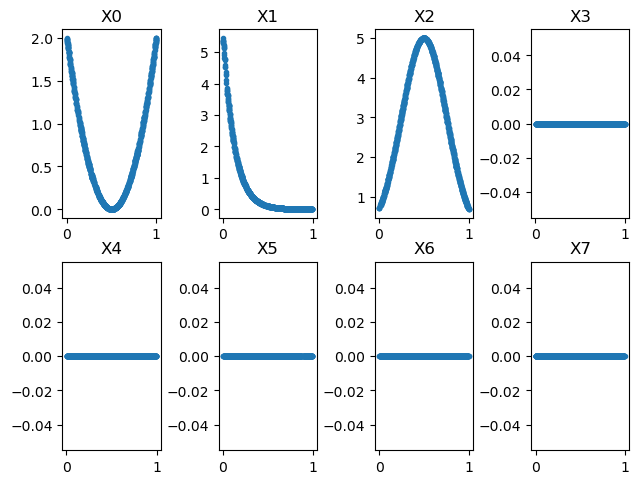

In [10]:
cfg = defaults()
gen_funcs, gen_func_names = task_sparse_features()
in_features = len(gen_funcs)

toydataset = ToyDataset(
    task_name="Sparse features task", 
    config=cfg, 
    num_samples=1000, 
    in_features=in_features, 
    x_start=0, 
    x_end=1, 
    gen_funcs=gen_funcs, 
    gen_func_names=gen_func_names
)
toydataset.plot()

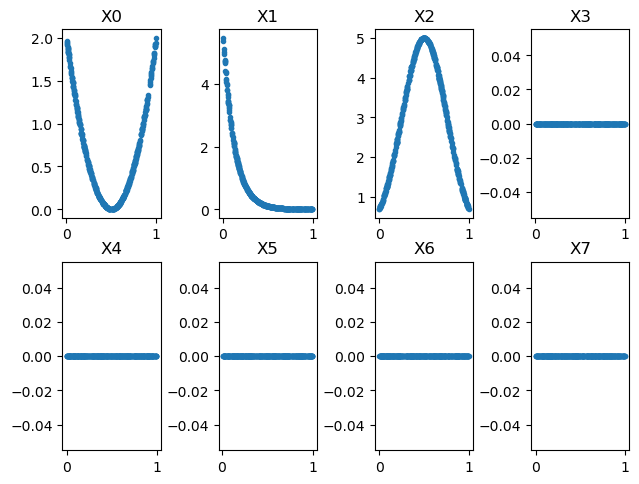

In [40]:
testset = ToyDataset(
    task_name="Sparse features task", 
    config=cfg, 
    num_samples=500, 
    in_features=in_features, 
    x_start=0, 
    x_end=1, 
    gen_funcs=gen_funcs, 
    gen_func_names=gen_func_names,
    use_test=True, 
)
testset.plot()

In [ ]:
M = 5 
cfg = Config(experiment_name='nam-sparse-features-2', regression=True, use_dnn=False, num_epochs=100, batch_size=128, shuffle=True, early_stopping_patience=50, decay_rate=0, logdir='./output', wandb=False, log_loss_frequency=10, lr=0.054396143263619814, l2_regularization=4.631609591678196e-05, output_regularization=0.010470977923804808, dropout=0, feature_dropout=0, num_basis_functions=64, hidden_sizes=[64, 32], activation='relu') 
models = []
for index in range(M):
    name = f"NAM_{index}"
    model = NAM(
        config=cfg, 
        name=name, 
        in_features=len(toydataset[0][0]), 
        num_units=cfg.num_basis_functions)
    trainer = Trainer(cfg, model, toydataset, testset)   
    trainer.train()
    models.append(model)

500


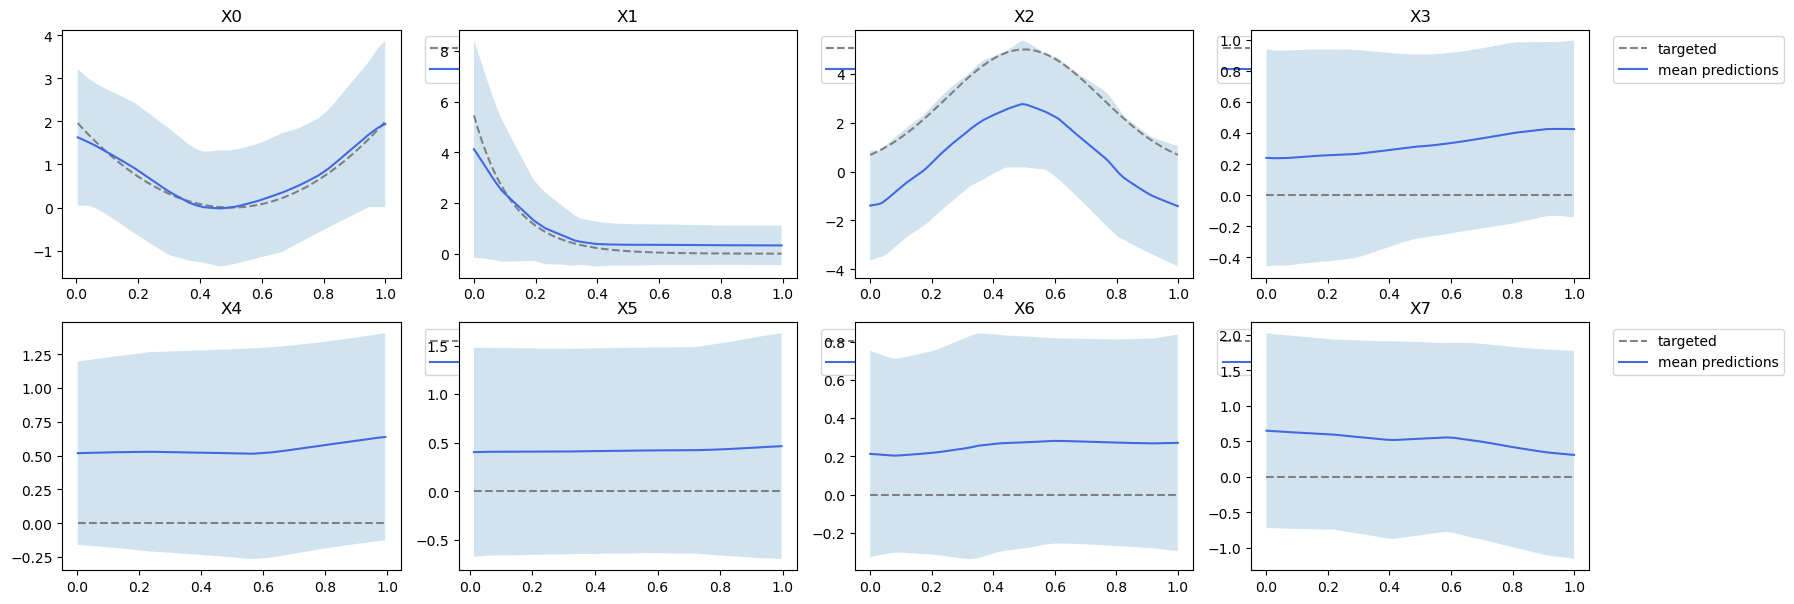

In [41]:
plot_ensemble(testset, models, 100)
print(len(testset))

In [ ]:
cfg = Config(experiment_name='nam-sparse-features-1', regression=True, use_dnn=False, num_epochs=100, batch_size=128, shuffle=True, early_stopping_patience=50, decay_rate=0.005, logdir='./output', wandb=False, log_loss_frequency=10, lr=0.0919654902038302, l2_regularization=1.4640076791162389e-06, output_regularization=0.03281951944416908, dropout=0, feature_dropout=0.05, num_basis_functions=1024, hidden_sizes=[], activation='relu') 
models_single = []
for index in range(M):
    name = f"NAM_{index}"
    model = NAM(
        config=cfg, 
        name=name, 
        in_features=len(toydataset[0][0]), 
        num_units=cfg.num_basis_functions)
    trainer = Trainer(cfg, model, toydataset, testset)   
    trainer.train()
    models_single.append(model)

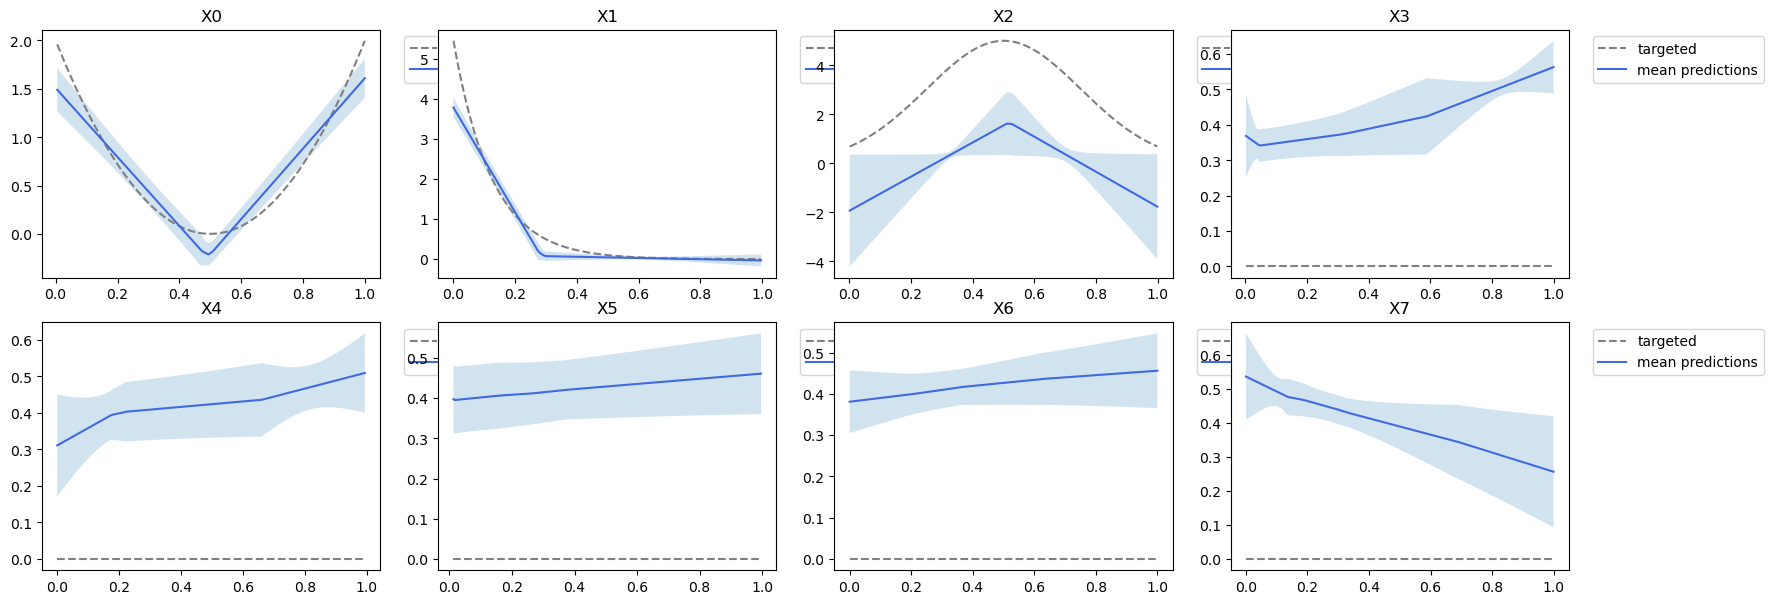

In [42]:
plot_ensemble(testset, models_single, 100)

In [ ]:
cfg = Config(experiment_name='nam-sparse-features-1', 
             regression=True, use_dnn=False, num_epochs=100, batch_size=128, shuffle=True, early_stopping_patience=50, 
             decay_rate=0.005, logdir='./output', wandb=False, log_loss_frequency=10, 
             lr=0.01, l2_regularization=1e-05, output_regularization=0, dropout=0.2, 
             feature_dropout=0.05, num_basis_functions=1024, hidden_sizes=[], activation='exu') 
models_exu = []
for index in range(M):
    name = f"NAM_{index}"
    model = NAM(
        config=cfg, 
        name=name, 
        in_features=len(toydataset[0][0]), 
        num_units=cfg.num_basis_functions)
    trainer = Trainer(cfg, model, toydataset, testset)   
    trainer.train()
    models_exu.append(model)

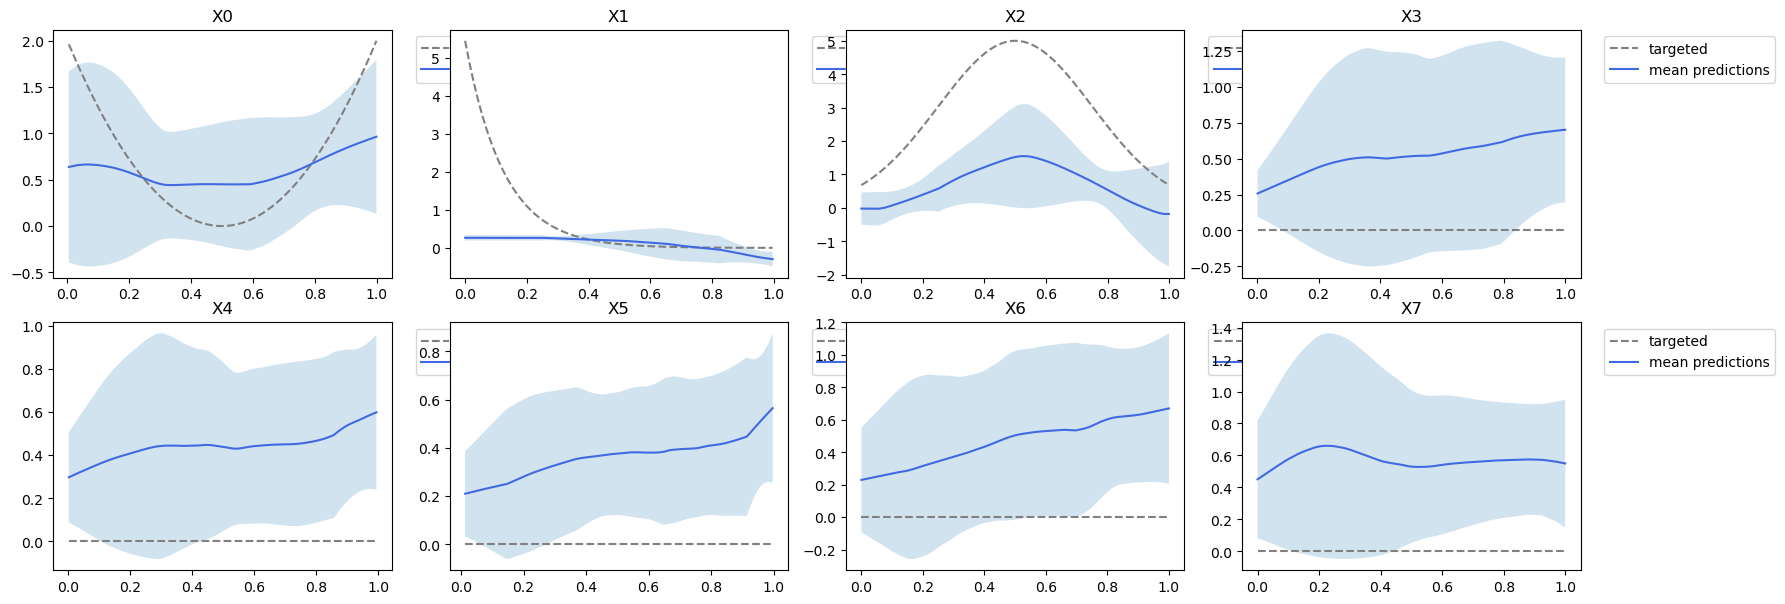

In [43]:
plot_ensemble(testset, models_exu, 100)